# GUARDA Y ESCALAR PARA DESPLEGAR EN STREAMLIT

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

In [288]:
df = pd.read_csv("C:/Users/aprats/OneDrive - Fundacio privada quiropractica/VARIOS/AP Personal/ML/bank_dataset.CSV")

In [290]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##### Sobre el Data Set
###### Age: La edad del cliente
###### Job: situación laboral o puesto de trabajo que ocupa
###### Marital: Estado civil del cliente
###### Education: Nivel de education que tiene el cliente
###### Default: Si tiene un crédito
###### Balance: Capacidad económica del cliente
###### Housing: Si tiene propidad o no
###### Loan: Si tiene prestamos
###### Contact: Como fue contactado el cliente
###### Day: Día dle mes que se le contactó
###### Month: Mes del año que se le contactó
###### Day: cantidad de dias que fueron llamados
###### Month: Mes del año que fue contactado
###### Duraction: duración de la llamada telefonica
###### Campaign: En que campaña fue contactado
###### Pday: Números de días que han pasado del ultimo contacto que se hizo con ese cliente
###### Previous: Numero de contactos realizados con el cliente antes de la campaña actual
###### Poutcome: Resultados de la campaña anterior
###### Deposit: el resultado de la campañana, Si invirtió o no


#### EDA

In [294]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### VALORES NULOS

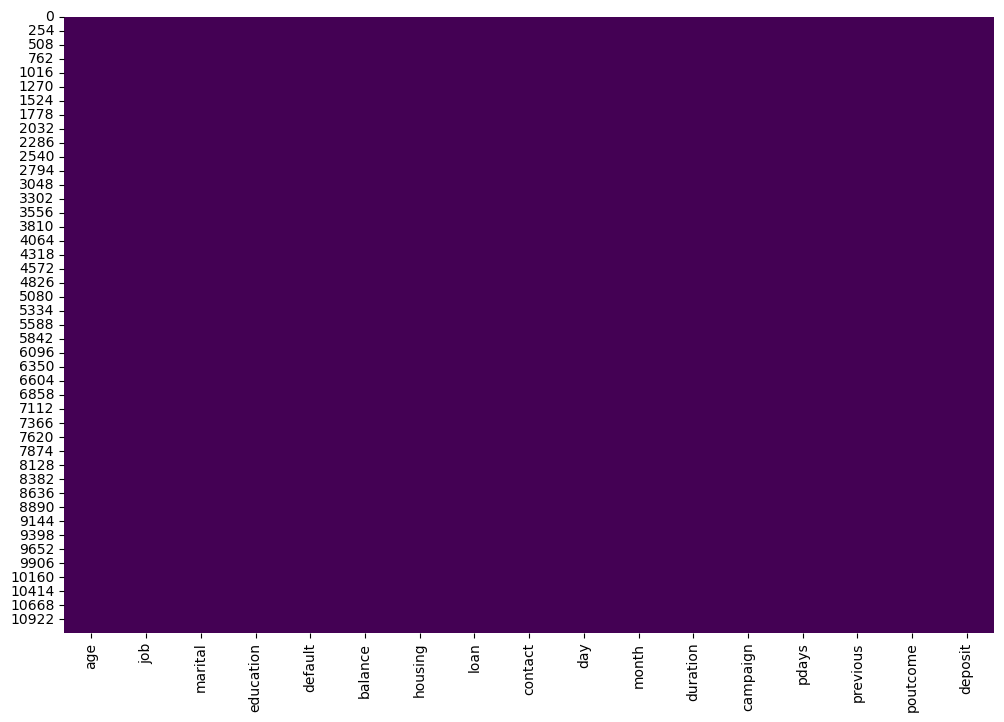

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [297]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show() 
df.isnull().sum()


# Dividir el conjunto de datos

In [300]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['deposit'])
y = df['deposit'] 

train_set, test_set, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [302]:
print(f"Conjunto de entrenamiento: {train_set.shape[0]} muestras")
print(f"Conjunto de prueba: {test_set.shape[0]} muestras")
print(f"Total de muestras: {train_set.shape[0] + test_set.shape[0]}")


Conjunto de entrenamiento: 8929 muestras
Conjunto de prueba: 2233 muestras
Total de muestras: 11162


# Detección Outliers

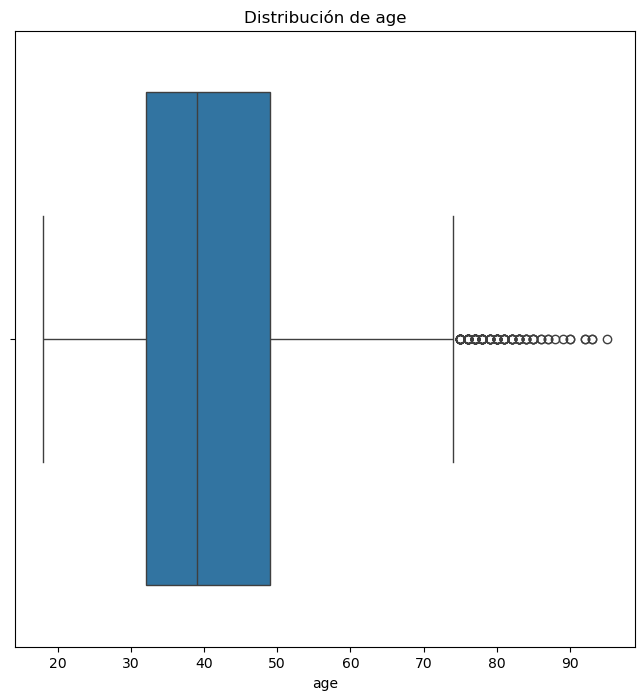

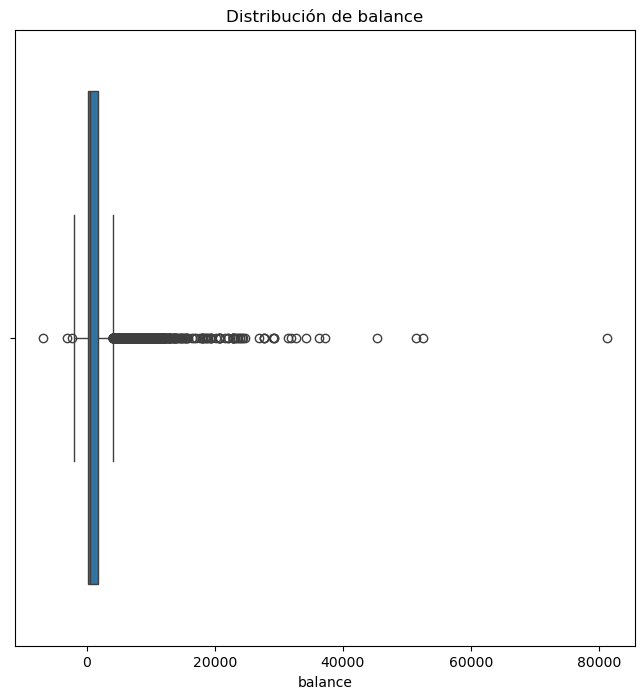

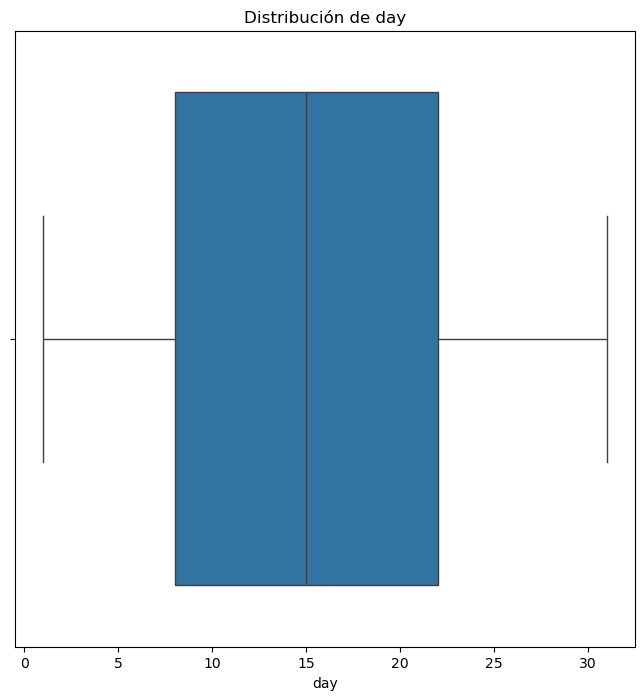

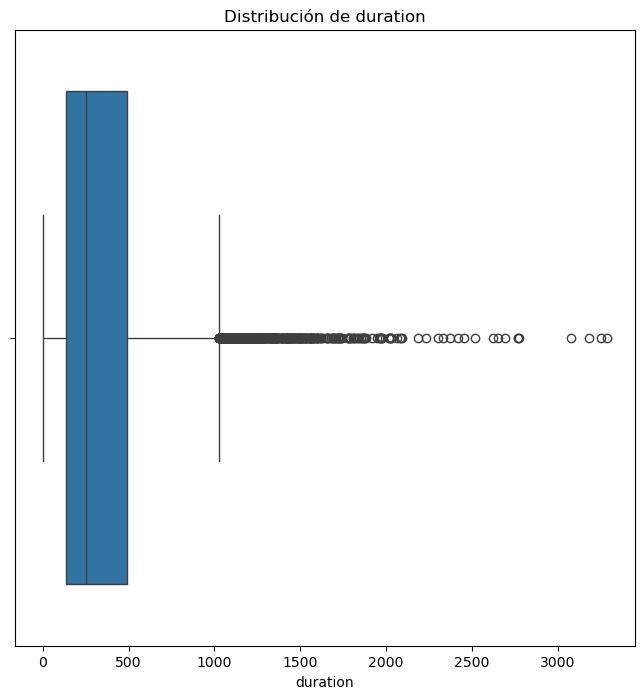

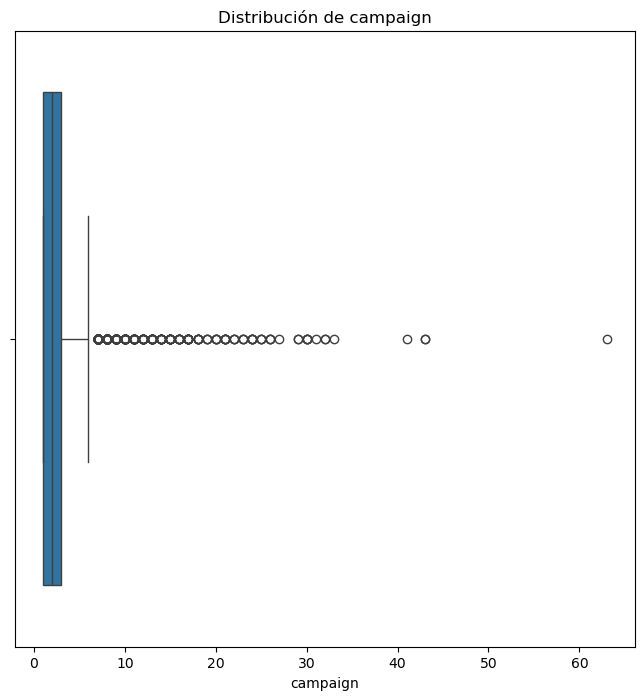

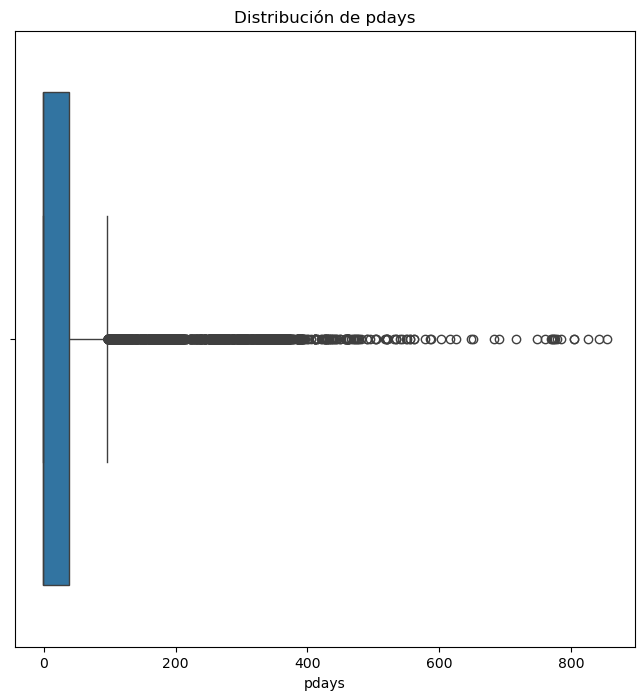

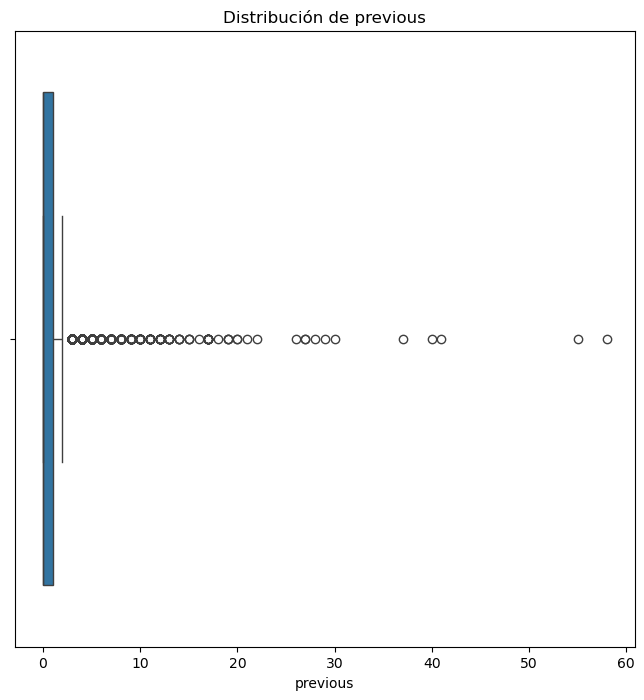

In [305]:
numerical_columns =train_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=train_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()


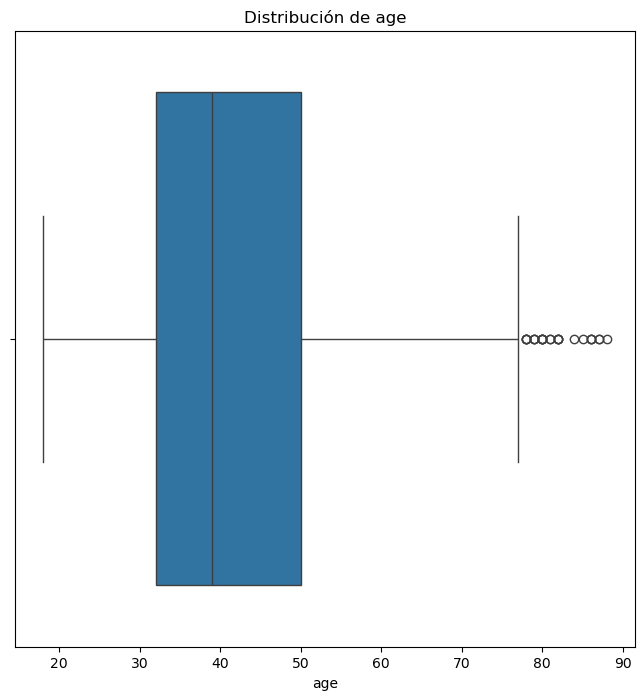

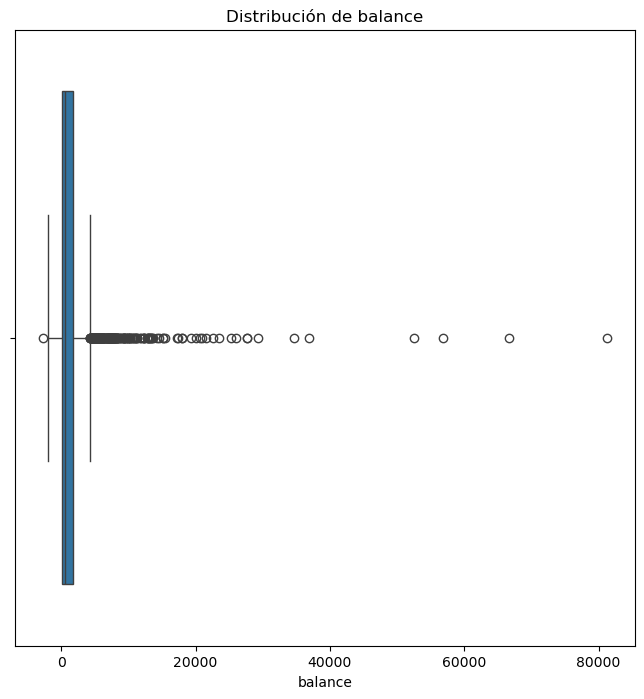

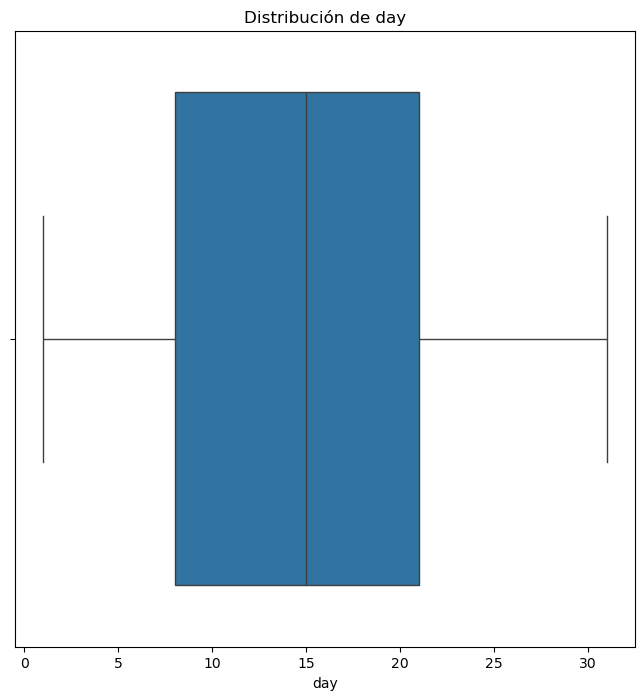

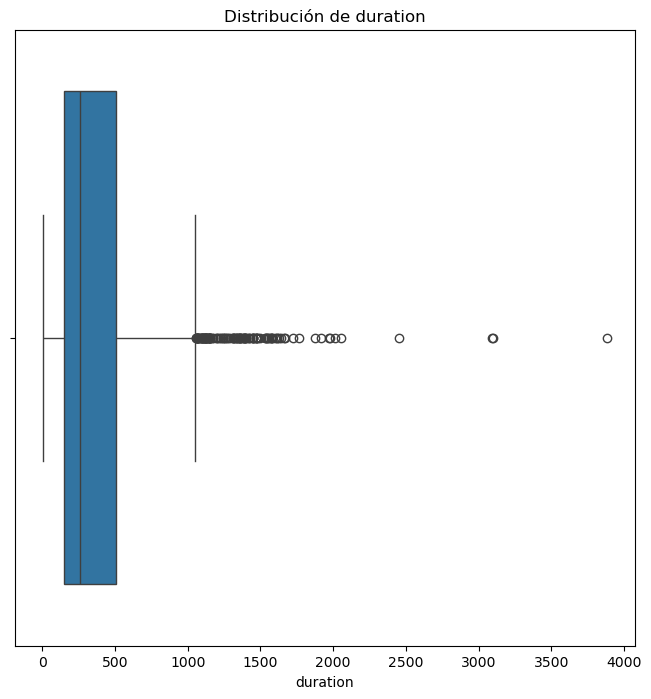

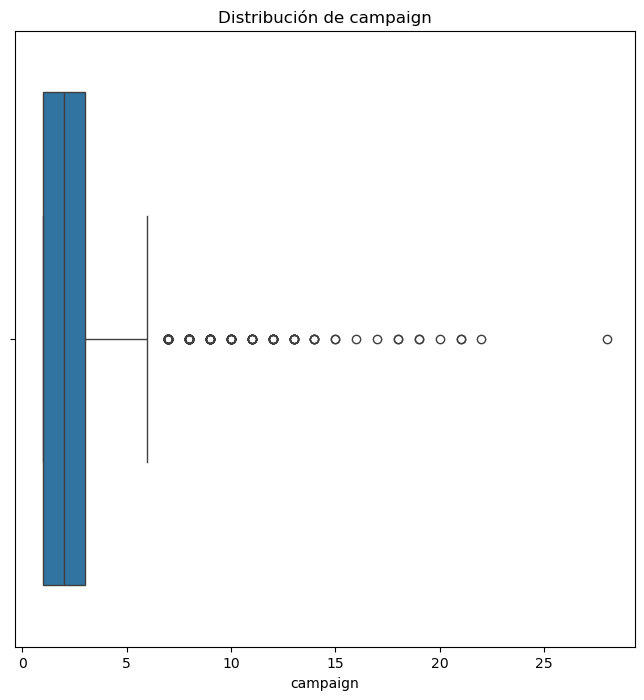

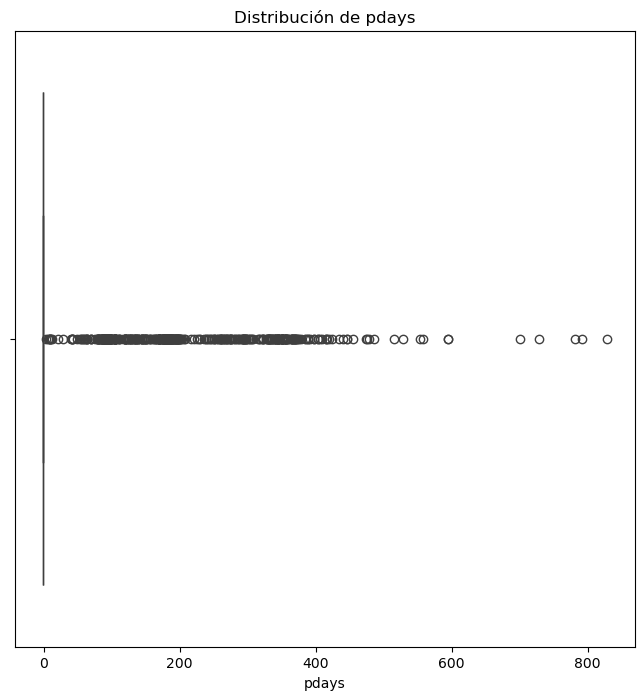

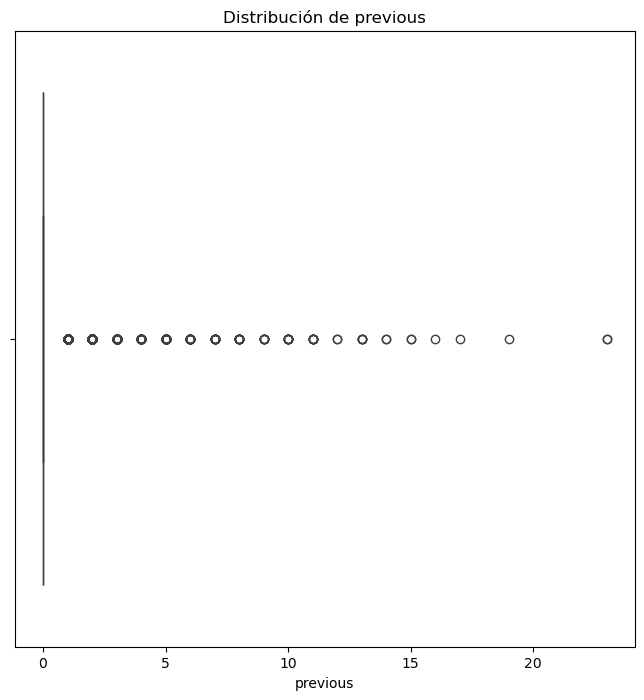

In [306]:
numerical_columns =test_set.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 8))
    sns.boxplot(data=test_set, x=col)
    plt.title(f'Distribución de {col}')
    plt.show()

### Tratamiento de Outliers

In [310]:
from scipy.stats.mstats import mquantiles

lower_limit, upper_limit = mquantiles(train_set['balance'], prob=[0.01, 0.99])

train_set['balance'] = train_set['balance'].clip(lower=lower_limit, upper=upper_limit)
test_set['balance'] = test_set['balance'].clip(lower=lower_limit, upper=upper_limit)



In [312]:
print("Valores nulos por columna:")
print(train_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          7
balance      0
housing      0
loan         0
poutcome     0
education    6
dtype: int64


In [314]:
print("Valores nulos por columna:")
print(test_set[['age', 'balance', 'housing', 'loan', 'poutcome','education']].isnull().sum())


Valores nulos por columna:
age          3
balance      0
housing      0
loan         0
poutcome     0
education    1
dtype: int64


In [316]:
print("\nValores faltantes en y_train:", y_train.isnull().sum())
print("Valores faltantes en y_test:", y_test.isnull().sum())



Valores faltantes en y_train: 0
Valores faltantes en y_test: 0


# Imputación de valores faltantes

In [319]:
print("Valores faltantes en el conjunto de entrenamiento:")
train_set.isnull().sum()

Valores faltantes en el conjunto de entrenamiento:


age          7
job          0
marital      4
education    6
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [321]:
print("Valores faltantes en el conjunto de prueba:")
test_set.isnull().sum()

Valores faltantes en el conjunto de prueba:


age          3
job          0
marital      1
education    1
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### Gestión de Valores Faltantes

In [324]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')


In [326]:
education_mode = train_set['education'].mode()[0]
train_set['education'] = train_set['education'].fillna(education_mode)
test_set['education'] = test_set['education'].fillna(education_mode)

age_median = train_set['age'].median()
train_set['age'] = train_set['age'].fillna(age_median)
test_set['age'] = test_set['age'].fillna(age_median)


In [328]:
print("Valores faltantes en 'education' después de la imputación:")
print(train_set['education'].isnull().sum())
print(test_set['education'].isnull().sum())

print("\nValores faltantes en 'age' después de la imputación:")
print(train_set['age'].isnull().sum())
print(test_set['age'].isnull().sum())


Valores faltantes en 'education' después de la imputación:
0
0

Valores faltantes en 'age' después de la imputación:
0
0


# Codificación de variables categóricas

In [331]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [333]:
from sklearn.preprocessing import LabelEncoder

In [335]:
for col in ['housing', 'loan', 'poutcome', 'education']:
    le = LabelEncoder()
    train_set[col] = le.fit_transform(train_set[col])
    test_set[col] = le.transform(test_set[col]) 
    
print("Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.")


Label Encoding aplicado a 'housing', 'loan', 'education' y 'poutcome'.


In [337]:
print(train_set.head())  

       age          job  marital  education default  balance  housing  loan  \
8644  46.0       admin.  married          1      no    526.0        0     1   
2632  46.0       admin.  married          2      no   2552.0        0     0   
3056  25.0   technician   single          1      no    139.0        0     1   
1080  43.0   technician  married          1      no   3288.0        1     0   
4006  37.0  blue-collar   single          3      no    217.0        0     0   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8644  cellular   31   jul       251         3     -1         0         3  
2632  cellular    3   sep       260         1     94         8         2  
3056  cellular   11   jan       202         1     91         1         2  
1080  cellular   21   nov       775         3     -1         0         3  
4006  cellular   23   sep       272         2     -1         0         3  


In [339]:
print(test_set.head())   

       age          job  marital  education default  balance  housing  loan  \
8220  32.0   management  married          2      no    393.0        0     0   
2521  36.0   technician   single          1      no    376.0        0     0   
7949  52.0       admin.  married          1      no    722.0        0     0   
7879  35.0   management   single          1     yes   -202.0        1     0   
616   41.0  blue-collar  married          1      no   -190.0        0     1   

       contact  day month  duration  campaign  pdays  previous  poutcome  
8220  cellular   28   jan       458         2     -1         0         3  
2521  cellular   13   aug       479         1     -1         0         3  
7949  cellular   26   oct        99         2    185         3         0  
7879   unknown   20   may       268         3     -1         0         3  
616   cellular   29   jul       808         3     -1         0         3  


In [341]:

train_set = train_set.drop(columns=['marital', 'job', 'month','duration'])
test_set = test_set.drop(columns=['marital', 'job', 'month','duration'])



In [343]:
print(train_set.columns)
print(test_set.columns)


Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


In [345]:
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})


In [347]:
print(y_train.head())
print(y_test.head())


8644    0
2632    1
3056    1
1080    1
4006    1
Name: deposit, dtype: int64
8220    0
2521    1
7949    0
7879    0
616     1
Name: deposit, dtype: int64


# Estandarización

In [350]:
from sklearn.preprocessing import StandardScaler

In [352]:
num_columns = ['age', 'balance', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()

train_set[num_columns] = scaler.fit_transform(train_set[num_columns])
test_set[num_columns] = scaler.transform(test_set[num_columns])


In [354]:
print("Media después de la estandarización (train_set):")
print(train_set[num_columns].mean())

print("\nDesviación estándar después de la estandarización (train_set):")
print(train_set[num_columns].std())


Media después de la estandarización (train_set):
age         2.319669e-16
balance    -2.964242e-17
campaign   -7.321081e-17
pdays      -4.456310e-17
previous   -4.376733e-18
dtype: float64

Desviación estándar después de la estandarización (train_set):
age         1.000056
balance     1.000056
campaign    1.000056
pdays       1.000056
previous    1.000056
dtype: float64


# Generación de Nuevas Características

In [357]:
print("Columnas en train_set:")
print(train_set.columns)

print("\nColumnas en test_set:")
print(test_set.columns)


Columnas en train_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

Columnas en test_set:
Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


In [359]:
train_set['balance_to_age_ratio'] = train_set['balance'] / train_set['age']
test_set['balance_to_age_ratio'] = test_set['balance'] / test_set['age']


In [361]:
print(train_set[['balance_to_age_ratio']].head())
print(test_set[['balance_to_age_ratio']].head())

      balance_to_age_ratio
8644             -0.941515
2632              1.239207
3056              0.412277
1080              5.255081
4006              1.516234
      balance_to_age_ratio
8220              0.582308
2521              1.055682
7949             -0.328059
7879              1.380892
616              76.448262


##### Categorizar 'balance' en rangos, esto solo se aplica

In [364]:
train_set['balance_category'] = pd.qcut(
    train_set['balance'], 
    q=4, 
    labels=['bajo', 'medio-bajo', 'medio-alto', 'alto']
)
test_set['balance_category'] = pd.qcut(
    test_set['balance'], 
    q=4, 
    labels=['bajo', 'medio-bajo', 'medio-alto', 'alto']
)


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_set['balance_category'] = encoder.fit_transform(train_set['balance_category'])
test_set['balance_category'] = encoder.transform(test_set['balance_category'])


print("Distribución en train_set (balance_category):")
print(train_set['balance_category'].value_counts())

print("\nDistribución en test_set (balance_category):")
print(test_set['balance_category'].value_counts())


Distribución en train_set (balance_category):
balance_category
1    2239
2    2233
0    2230
3    2227
Name: count, dtype: int64

Distribución en test_set (balance_category):
balance_category
1    559
3    558
2    558
0    558
Name: count, dtype: int64


In [366]:
train_set['balance_age_ratio'] = train_set['balance'] / (train_set['age'] + 1)  
test_set['balance_age_ratio'] = test_set['balance'] / (test_set['age'] + 1)


In [368]:
print(train_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())
print(test_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())


           age   balance  balance_category  balance_age_ratio
8644  0.411944 -0.387852                 3          -0.274693
2632  0.411944  0.510484                 0           0.361547
3056 -1.356972 -0.559449                 3           1.567206
1080  0.159242  0.836830                 0           0.721877
4006 -0.346163 -0.524864                 3          -0.802744
           age   balance  balance_category  balance_age_ratio
8220 -0.767333 -0.446825                 3          -1.920450
2521 -0.430397 -0.454362                 3          -0.797682
7949  0.917349 -0.300945                 2          -0.156959
7879 -0.514631 -0.710650                 1          -1.464144
616  -0.009226 -0.705329                 1          -0.711897


In [370]:
print("Categorías en train_set (balance_category):")
print(train_set['balance_category'].unique())

print("\nCategorías en test_set (balance_category):")
print(test_set['balance_category'].unique())


Categorías en train_set (balance_category):
[3 0 1 2]

Categorías en test_set (balance_category):
[3 2 1 0]


In [372]:
print(train_set.dtypes)


age                     float64
education                 int32
default                  object
balance                 float64
housing                   int32
loan                      int32
contact                  object
day                       int64
campaign                float64
pdays                   float64
previous                float64
poutcome                  int32
balance_to_age_ratio    float64
balance_category          int32
balance_age_ratio       float64
dtype: object


In [374]:
print(train_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())
print(test_set[['age', 'balance', 'balance_category', 'balance_age_ratio']].head())

           age   balance  balance_category  balance_age_ratio
8644  0.411944 -0.387852                 3          -0.274693
2632  0.411944  0.510484                 0           0.361547
3056 -1.356972 -0.559449                 3           1.567206
1080  0.159242  0.836830                 0           0.721877
4006 -0.346163 -0.524864                 3          -0.802744
           age   balance  balance_category  balance_age_ratio
8220 -0.767333 -0.446825                 3          -1.920450
2521 -0.430397 -0.454362                 3          -0.797682
7949  0.917349 -0.300945                 2          -0.156959
7879 -0.514631 -0.710650                 1          -1.464144
616  -0.009226 -0.705329                 1          -0.711897


In [376]:
print(train_set[['balance', 'balance_category']].groupby('balance_category').describe())


                 balance                                                    \
                   count      mean       std       min       25%       50%   
balance_category                                                             
0                 2230.0  1.297609  1.272867  0.130931  0.410275  0.836608   
1                 2239.0 -0.638070  0.070138 -0.854279 -0.621082 -0.621082   
2                 2233.0 -0.174336  0.143883 -0.375880 -0.301831 -0.201179   
3                 2227.0 -0.483043  0.053895 -0.566544 -0.530184 -0.488061   

                                      
                       75%       max  
balance_category                      
0                 1.691158  5.079762  
1                -0.600686 -0.566987  
2                -0.059290  0.130044  
3                -0.439287 -0.376323  


# VERIFICACION EN PIPELINE

In [379]:
print("Columnas en train_set:", train_set.columns)
print("Columnas en test_set:", test_set.columns)

print("\n¿Las columnas son consistentes?:", set(train_set.columns) == set(test_set.columns))


Columnas en train_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio'],
      dtype='object')
Columnas en test_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio'],
      dtype='object')

¿Las columnas son consistentes?: True


In [381]:
print("Valores faltantes en train_set:")
print(train_set.isnull().sum())

print("\nValores faltantes en test_set:")
print(test_set.isnull().sum())


Valores faltantes en train_set:
age                     0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
campaign                0
pdays                   0
previous                0
poutcome                0
balance_to_age_ratio    0
balance_category        0
balance_age_ratio       0
dtype: int64

Valores faltantes en test_set:
age                     0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
campaign                0
pdays                   0
previous                0
poutcome                0
balance_to_age_ratio    0
balance_category        0
balance_age_ratio       0
dtype: int64


### Descripción estadística de las columnas numéricas


In [384]:
print("Estadísticas en train_set:")
print(train_set.describe().T)

print("\nEstadísticas en test_set:")
print(test_set.describe().T)


Estadísticas en train_set:
                       count          mean        std         min       25%  \
age                   8929.0  2.319669e-16   1.000056   -1.946611 -0.767333   
education             8929.0  1.288834e+00   0.752988    0.000000  1.000000   
balance               8929.0 -2.964242e-17   1.000056   -0.854279 -0.566987   
housing               8929.0  4.736253e-01   0.499332    0.000000  0.000000   
loan                  8929.0  1.294658e-01   0.335734    0.000000  0.000000   
day                   8929.0  1.568350e+01   8.429058    1.000000  8.000000   
campaign              8929.0 -7.321081e-17   1.000056   -0.540031 -0.540031   
pdays                 8929.0 -4.456310e-17   1.000056   -0.484037 -0.484037   
previous              8929.0 -4.376733e-18   1.000056   -0.355931 -0.355931   
poutcome              8929.0  2.473513e+00   1.006252    0.000000  2.000000   
balance_to_age_ratio  8929.0  1.528646e-01  17.583684 -550.578443 -0.533484   
balance_category      892

##### nuestos valores están dentro del rango 0 y 1 lo cual confirma que tenemos una estadistica consistente

# ENTRENAMIENTO DEL MODELO NO SUPERVISADO

In [388]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

columns_for_clustering = ['age', 'balance', 'campaign', 'pdays','education']
X_clustering = train_set[columns_for_clustering]

In [390]:

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_clustering)
    silhouette_avg = silhouette_score(X_clustering, clusters)
    print(f"Índice de Silueta para k={k}: {silhouette_avg:.2f}")


Índice de Silueta para k=2: 0.35
Índice de Silueta para k=3: 0.25
Índice de Silueta para k=4: 0.28
Índice de Silueta para k=5: 0.23


In [392]:

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clustering)



## Asignar cluster al conjunto de datos

In [395]:
train_set['cluster'] = clusters

print(train_set[['age', 'balance', 'campaign', 'pdays','education']].head())


           age   balance  campaign     pdays  education
8644  0.411944 -0.387852  0.178481 -0.484037          1
2632  0.411944  0.510484 -0.540031  0.386954          2
3056 -1.356972 -0.559449 -0.540031  0.359449          1
1080  0.159242  0.836830  0.178481 -0.484037          1
4006 -0.346163 -0.524864 -0.180775 -0.484037          3


### Calculamos las estadisticas promedio para cada cluster

In [398]:
numeric_columns = train_set.select_dtypes(include=['number']).columns
cluster_summary = train_set[numeric_columns].groupby('cluster').mean()

print(cluster_summary)


              age  education   balance   housing      loan        day  \
cluster                                                                 
0       -0.064571   1.278002 -0.288022  0.485747  0.138875  15.616044   
1        0.511410   1.374625  2.281154  0.377622  0.054945  16.217782   

         campaign     pdays  previous  poutcome  balance_to_age_ratio  \
cluster                                                                 
0        0.007599 -0.003403 -0.012141  2.482089              0.958838   
1       -0.060185  0.026953  0.096162  2.405594             -6.230511   

         balance_category  balance_age_ratio  
cluster                                       
0                1.688446           0.097375  
1                0.000000           1.297456  


In [400]:
cluster_distribution = train_set['cluster'].value_counts(normalize=True) * 100
print("\nDistribución de clientes por cluster (%):")
print(cluster_distribution)



Distribución de clientes por cluster (%):
cluster
0    88.789338
1    11.210662
Name: proportion, dtype: float64


In [402]:
print("Características promedio por cluster:")
print(cluster_summary)


Características promedio por cluster:
              age  education   balance   housing      loan        day  \
cluster                                                                 
0       -0.064571   1.278002 -0.288022  0.485747  0.138875  15.616044   
1        0.511410   1.374625  2.281154  0.377622  0.054945  16.217782   

         campaign     pdays  previous  poutcome  balance_to_age_ratio  \
cluster                                                                 
0        0.007599 -0.003403 -0.012141  2.482089              0.958838   
1       -0.060185  0.026953  0.096162  2.405594             -6.230511   

         balance_category  balance_age_ratio  
cluster                                       
0                1.688446           0.097375  
1                0.000000           1.297456  


In [404]:
test_set['cluster'] = kmeans.predict(test_set[['age', 'balance', 'campaign', 'pdays','education']])


# ENTRENAMIENTO DEL MODELO  SUPERVISADO

In [407]:
print("Columnas en train_set:", train_set.columns)
print("\nColumnas en test_set:", test_set.columns)


Columnas en train_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio',
       'cluster'],
      dtype='object')

Columnas en test_set: Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_to_age_ratio', 'balance_category', 'balance_age_ratio',
       'cluster'],
      dtype='object')


In [409]:
predictor_columns = ['pdays', 'housing', 'loan', 'previous', 'balance_to_age_ratio', 'balance_category', 'cluster']

train_set_updated = train_set[predictor_columns]
test_set_updated = test_set[predictor_columns]


In [411]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=500)

log_reg.fit(train_set_updated, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [413]:
y_pred = log_reg.predict(test_set_updated)


### Matriz de Confusión

In [416]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud (Accuracy): {accuracy:.2f}")


Matriz de Confusión:
[[665 510]
 [356 702]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1175
           1       0.58      0.66      0.62      1058

    accuracy                           0.61      2233
   macro avg       0.62      0.61      0.61      2233
weighted avg       0.62      0.61      0.61      2233


Exactitud (Accuracy): 0.61


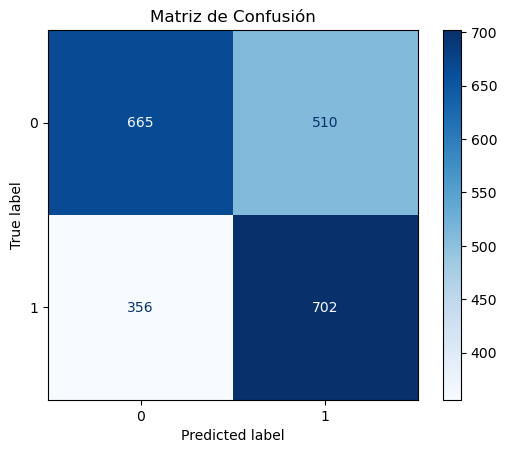

In [418]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()


In [420]:
from sklearn.metrics import roc_curve, roc_auc_score


#### Calcular la curva ROC y Calcular el AUC

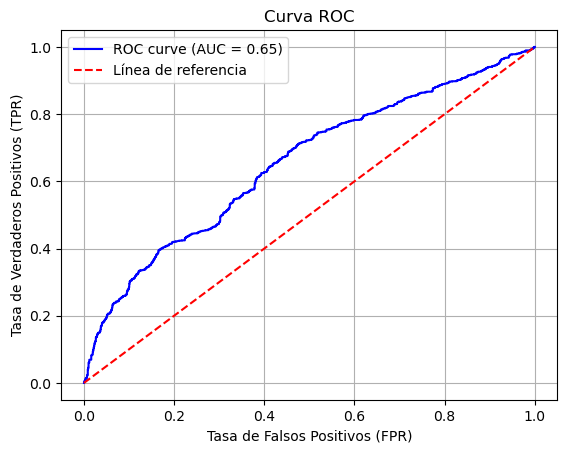

In [423]:
y_pred_prob = log_reg.predict_proba(test_set_updated)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Línea de referencia')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()



### Obtener los coeficientes del modelo y gráfica de la importacia de las categorías


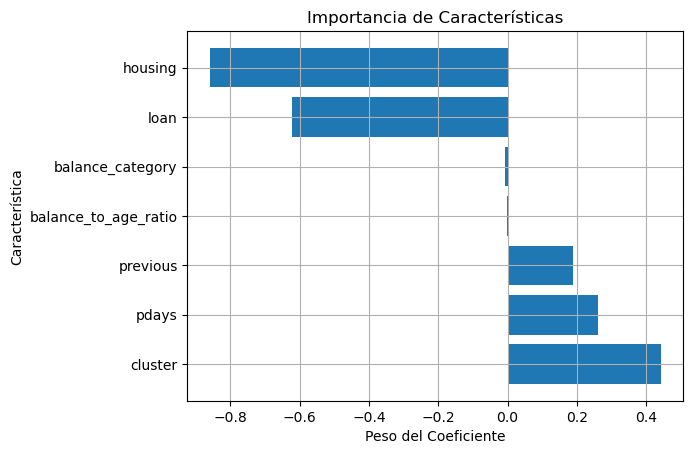

In [426]:
feature_importance = pd.DataFrame({'Característica': predictor_columns, 'Importancia': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)


plt.barh(feature_importance['Característica'], feature_importance['Importancia'])
plt.title('Importancia de Características')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Característica')
plt.grid(True)
plt.show()


# GUARDAR Y ESCALAR

In [434]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)  # log_reg es tu modelo de regresión logística


with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)  # scaler es tu StandardScaler ya ajustado

print("Modelo y escalador guardados exitosamente.")



Modelo y escalador guardados exitosamente.


# CREACION DE APP.PY
##### Aunque aqui no se ejecutará se deja evidencia del proceso realizado, ya que el archivo se guardo en python para luego subirlo al repositorio

In [436]:
wimport streamlit as st
import pickle
import numpy as np


with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)


st.title("Predicción de Aceptación de Producto Bancario")


st.write("""
Ingrese los datos del cliente para predecir si aceptará o no el producto.
""")


age = st.number_input("Edad del cliente:", min_value=18, max_value=100, step=1)
balance = st.number_input("Balance promedio en la cuenta bancaria:")
education = st.selectbox("Nivel educativo del cliente:", options=['Primario', 'Secundario', 'Terciario'])
housing = st.selectbox("¿Tiene hipoteca?", options=['Sí', 'No'])
loan = st.selectbox("¿Tiene préstamo personal?", options=['Sí', 'No'])
poutcome = st.selectbox("Resultado de la campaña previa:", options=['Éxito', 'Fracaso', 'Desconocido'])


education_map = {'Primario': 0, 'Secundario': 1, 'Terciario': 2}
housing_map = {'No': 0, 'Sí': 1}
loan_map = {'No': 0, 'Sí': 1}
poutcome_map = {'Desconocido': 0, 'Fracaso': 1, 'Éxito': 2}


input_data = np.array([[age, balance, education_map[education], housing_map[housing], loan_map[loan], poutcome_map[poutcome]]])
input_data_scaled = scaler.transform(input_data)


if st.button("Predecir"):
    prediction = model.predict(input_data_scaled)
    resultado = "Aceptará el producto" if prediction[0] == 1 else "No aceptará el producto"
    st.subheader(f"Resultado de la predicción: {resultado}")


SyntaxError: invalid syntax (3545972114.py, line 1)

# CREACION DE DOCUMENTO REQUIREMENTS.TEXT
#### Creacion del documento cpon las bibliotecas utilizadas en el modelo

In [438]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
